In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree
import pydotplus

In [50]:
data = pd.read_csv("user_satisfaction_survey.csv")


In [51]:
X = data.drop(['Churn','ID','Classes_per_week'], axis=1) #Dropping the ID column also - its not needed
y = data.drop(['ID','Classes_per_week','Happy_with_instructors','Happy_with_class_duration','Happy_with_class_timings','Happy_with_class_size','Happy_with_facilities','Happy_with_price'],axis=1)

In [52]:
#y.head()

In [53]:
def convert_yes_no(text):
    if 'Yes' in text:
        return 1
    else: return 0

In [54]:
X.Happy_with_instructors = X.Happy_with_instructors.apply(convert_yes_no)
X.Happy_with_class_duration = X.Happy_with_class_duration.apply(convert_yes_no)
X.Happy_with_class_timings = X.Happy_with_class_timings.apply(convert_yes_no)
X.Happy_with_class_size = X.Happy_with_class_size.apply(convert_yes_no)
X.Happy_with_facilities = X.Happy_with_facilities.apply(convert_yes_no)
X.Happy_with_price = X.Happy_with_price.apply(convert_yes_no)
y.Churn = y.Churn.apply(convert_yes_no)

In [55]:
#X.head()
#y.head()

In [56]:
def plot_dtree(model, feature_name):
    dot_data = StringIO()  
    tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=feature_name 
                         )  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [57]:
X_train = X
Y_train = y
X_train.head()

,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,1,1,0,1,1,1
1,1,0,1,1,0,0
2,0,1,1,1,1,0
3,0,1,0,1,0,1
4,1,1,1,1,1,1


In [58]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train,Y_train)

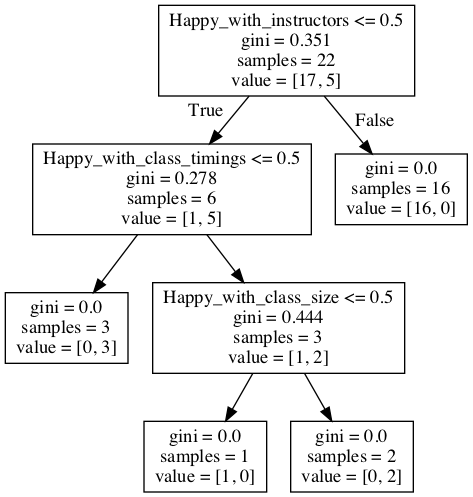

In [59]:
plot_dtree(model, X_train.columns)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [218]:
dtree = DecisionTreeClassifier()

In [227]:
X_train = X.columns[0:8]
X_train

Index(['Happy_with_instructors', 'Happy_with_class_duration',
       'Happy_with_class_timings', 'Happy_with_class_size',
       'Happy_with_facilities', 'Happy_with_price'],
      dtype='object')

In [242]:
model = dtree.fit(X,y) #df = x_train, target = y_train

In [220]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from sklearn import tree
import pydotplus

In [243]:
feature_name = X.columns
feature_name

Index(['Happy_with_instructors', 'Happy_with_class_duration',
       'Happy_with_class_timings', 'Happy_with_class_size',
       'Happy_with_facilities', 'Happy_with_price'],
      dtype='object')

In [244]:
target_name = (y.columns)
target_name

Index(['Churn'], dtype='object')

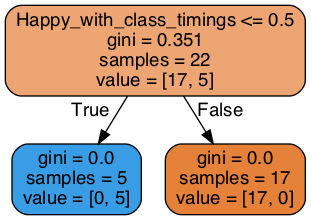

In [252]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_name, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [257]:
def plot_dtree(model, feture_name, target_name):
    dot_data = StringIO()  
    tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name  
                         )  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


In [258]:
plot_dtree(model, feature_name, target_name)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [13]:
import joblib

In [14]:
joblib.dump(dtree,"dtree_classifier2")

['dtree_classifier2']

In [15]:
dt2 = joblib.load('dtree_classifier2')

In [32]:
sample2 = [2,'No', 'Yes', 'No', 'No', 'Yes', 'No']
sample2 = pd.DataFrame([sample2], columns = X.columns)
sample2

,Classes_per_week,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,2,No,Yes,No,No,Yes,No


In [43]:
cols = sample2.loc[:,"Happy_with_instructors":"Happy_with_price"]
cols 

,Happy_with_instructors,Happy_with_class_duration,Happy_with_class_timings,Happy_with_class_size,Happy_with_facilities,Happy_with_price
0,No,Yes,No,No,Yes,No
